In [97]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv('data/NYC.csv',nrows=100000)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
data.size

1100000

In [13]:
data.shape

(100000, 11)

In [15]:
data.describe

<bound method NDFrame.describe of               id  vendor_id  ... store_and_fwd_flag trip_duration
0      id2875421          2  ...                  N           455
1      id2377394          1  ...                  N           663
2      id3858529          2  ...                  N          2124
3      id3504673          2  ...                  N           429
4      id2181028          2  ...                  N           435
...          ...        ...  ...                ...           ...
99995  id3533185          1  ...                  N           313
99996  id2601957          2  ...                  N           738
99997  id1220173          2  ...                  N           968
99998  id1103473          1  ...                  N           597
99999  id3581058          2  ...                  N           205

[100000 rows x 11 columns]>

In [17]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [19]:
data['vendor_id'].nunique()

2

In [23]:
data['vendor_id'].value_counts()

vendor_id
2    53349
1    46651
Name: count, dtype: int64

In [25]:
data1=data.drop(['id','dropoff_datetime'],axis=1)

In [27]:
data.shape

(100000, 11)

In [29]:
data1.shape

(100000, 9)

In [31]:
# data1=data1['vendor_id'].astype('object')
data1['vendor_id']=data1['vendor_id'].map({1:'Uber',2:'Ola'})

In [35]:
data1.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,Ola,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,Uber,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,Ola,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,Ola,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,Ola,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [37]:
data1.dtypes

vendor_id              object
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [39]:
from datetime import datetime

In [43]:
data1['travel_day']=pd.to_datetime(data['pickup_datetime']).apply(lambda x:x.strftime("%A"))
data1.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_day
0,Ola,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday
1,Uber,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday
2,Ola,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday
3,Ola,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday
4,Ola,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday


In [45]:
def time_bucket(x):
    hour=int(x.strftime("%H"))
    if hour < 6 or hour > 24:
        return 'night'
    elif hour < 12:
        return 'morning'
    elif hour <18:
        return 'afternoon'
    else:
        return 'evening'        

In [47]:
data1['travel_time']=pd.to_datetime(data['pickup_datetime']).apply(lambda x:time_bucket(x))

In [49]:
data1.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_day,travel_time
0,Ola,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,afternoon
1,Uber,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,night
2,Ola,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,morning
3,Ola,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,evening
4,Ola,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,afternoon


In [51]:
data1.drop('pickup_datetime',axis=1,inplace=True)

In [53]:
data1.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_day,travel_time
0,Ola,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,afternoon
1,Uber,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,night
2,Ola,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,morning
3,Ola,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,evening
4,Ola,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,afternoon


In [55]:
data1.isna().sum()

vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
travel_day            0
travel_time           0
dtype: int64

In [57]:
data1.dtypes

vendor_id              object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
travel_day             object
travel_time            object
dtype: object

In [61]:
obj_df=data1.select_dtypes(include=['object'])
obj_df.head()

,vendor_id,store_and_fwd_flag,travel_day,travel_time
0,Ola,N,Monday,afternoon
1,Uber,N,Sunday,night
2,Ola,N,Tuesday,morning
3,Ola,N,Wednesday,evening
4,Ola,N,Saturday,afternoon


In [65]:
num_df=data1.select_dtypes(include=['float64','int64'])
num_df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,-73.980415,40.738564,-73.999481,40.731152,663
2,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,1,-74.010040,40.719971,-74.012268,40.706718,429
4,1,-73.973053,40.793209,-73.972923,40.782520,435


In [67]:
obj_dummies=pd.get_dummies(obj_df,drop_first=True)
obj_dummies.head()

,vendor_id_Uber,store_and_fwd_flag_Y,travel_day_Monday,travel_day_Saturday,travel_day_Sunday,travel_day_Thursday,travel_day_Tuesday,travel_day_Wednesday,travel_time_evening,travel_time_morning,travel_time_night
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,True,True,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [69]:
obj_dummies.shape

(100000, 11)

In [71]:
num_df.shape

(100000, 6)

In [73]:
final_df=pd.concat([obj_dummies,num_df],axis=1)
final_df.head()

,vendor_id_Uber,store_and_fwd_flag_Y,travel_day_Monday,travel_day_Saturday,travel_day_Sunday,travel_day_Thursday,travel_day_Tuesday,travel_day_Wednesday,travel_time_evening,travel_time_morning,travel_time_night,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,False,False,True,False,False,False,False,False,False,False,False,1,-73.982155,40.767937,-73.964630,40.765602,455
1,True,False,False,False,True,False,False,False,False,False,True,1,-73.980415,40.738564,-73.999481,40.731152,663
2,False,False,False,False,False,False,True,False,False,True,False,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,False,False,False,False,False,False,False,True,True,False,False,1,-74.010040,40.719971,-74.012268,40.706718,429
4,False,False,False,True,False,False,False,False,False,False,False,1,-73.973053,40.793209,-73.972923,40.782520,435


In [75]:
final_df.shape

(100000, 17)

In [77]:
x=final_df.drop('trip_duration',axis=1)
x

,vendor_id_Uber,store_and_fwd_flag_Y,travel_day_Monday,travel_day_Saturday,travel_day_Sunday,travel_day_Thursday,travel_day_Tuesday,travel_day_Wednesday,travel_time_evening,travel_time_morning,travel_time_night,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,False,False,True,False,False,False,False,False,False,False,False,1,-73.982155,40.767937,-73.964630,40.765602
1,True,False,False,False,True,False,False,False,False,False,True,1,-73.980415,40.738564,-73.999481,40.731152
2,False,False,False,False,False,False,True,False,False,True,False,1,-73.979027,40.763939,-74.005333,40.710087
3,False,False,False,False,False,False,False,True,True,False,False,1,-74.010040,40.719971,-74.012268,40.706718
4,False,False,False,True,False,False,False,False,False,False,False,1,-73.973053,40.793209,-73.972923,40.782520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,True,False,True,False,False,False,False,False,True,False,False,1,-73.958275,40.772923,-73.965645,40.763599
99996,False,False,False,False,False,True,False,False,False,True,False,6,-73.958778,40.766708,-73.956139,40.779018
99997,False,False,False,False,False,True,False,False,False,False,True,1,-73.945961,40.780510,-73.861778,40.768421
99998,True,False,True,False,False,False,False,False,False,True,False,1,-73.983887,40.738544,-73.970932,40.751678


In [79]:
y=final_df['trip_duration']
y

0         455
1         663
2        2124
3         429
4         435
         ... 
99995     313
99996     738
99997     968
99998     597
99999     205
Name: trip_duration, Length: 100000, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42) 

In [83]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() 
reg.fit(x_train,y_train) 

LinearRegression()

In [85]:
ypred=reg.predict(x_test)
ypred

array([1185.93098712,  883.96456073,  600.52833292, ..., 2252.29485053,
        947.33585676,  944.42113455])

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,ypred)

567.0104780375502

In [91]:
mean_squared_error(y_test,ypred)

9773273.326005913

In [101]:
np.sqrt(mean_squared_error(y_test,ypred))

3126.2234926514634

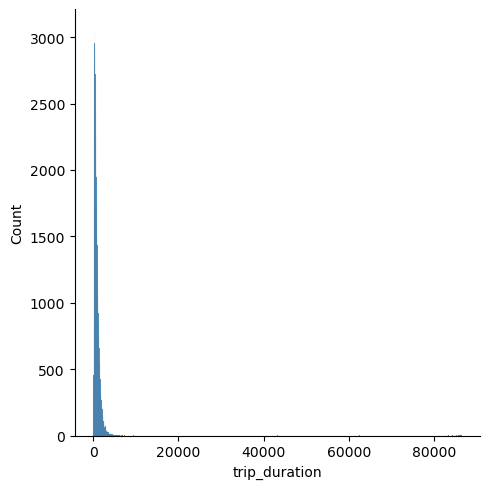

In [103]:
sns.displot(y)

<Axes: ylabel='trip_duration'>

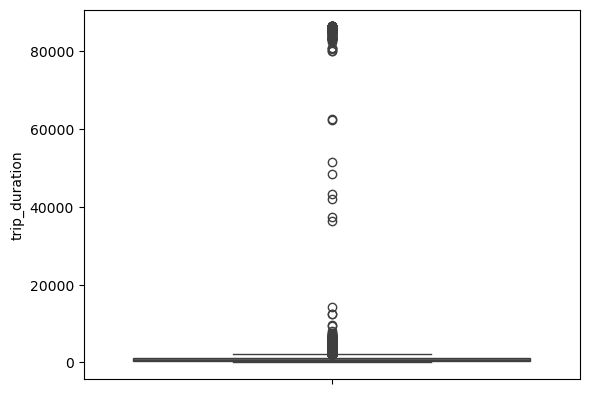

In [105]:
sns.boxplot(y)

In [107]:
y.describe()

count    100000.000000
mean        939.864260
std        3004.541199
min           1.000000
25%         396.000000
50%         662.000000
75%        1076.000000
max       86390.000000
Name: trip_duration, dtype: float64

In [111]:
r2_score(y_test,ypred)

0.010429723169142258

In [113]:
npd=final_df['trip_duration'].describe()
UT=npd['75%']+1.5*(npd['75%']-npd['25%'])
LT=npd['25%']-1.5*(npd['75%']-npd['25%'])

In [115]:
UT

2096.0

In [117]:
LT

-624.0

In [119]:
remove_index=final_df[final_df['trip_duration']>2096].index.tolist()

In [121]:
final_df.drop(remove_index,axis=0,inplace=True)

In [123]:
final_df.shape

(94960, 17)

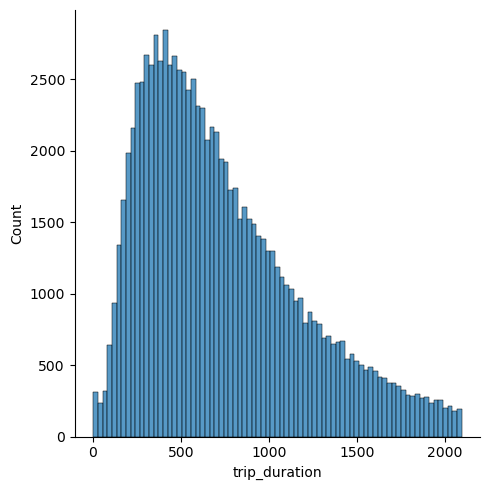

In [125]:
sns.displot(final_df['trip_duration'])

<Axes: ylabel='trip_duration'>

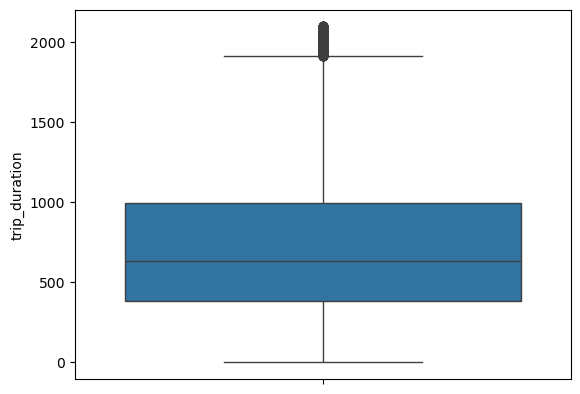

In [127]:
sns.boxplot(final_df['trip_duration'])

In [129]:
x=final_df.drop('trip_duration',axis=1)
y=final_df['trip_duration']


In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42) 

In [133]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() 
reg.fit(x_train,y_train) 

LinearRegression()

In [135]:
ypred=reg.predict(x_test)
ypred

array([808.06557786, 692.71787255, 925.61342725, ..., 767.49345951,
       694.31653238, 665.38263522])

In [137]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,ypred)

347.2742938165872

In [141]:
r2_score(y_test,ypred)

0.06350296900232577